In [81]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16}) 
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
import numpy as np
iris = load_iris()

In [82]:
X_original = iris.data
Y = iris.target
features = iris.feature_names
targets = iris.target_names
sel_f = [0,1]
X = X_original[:,sel_f]

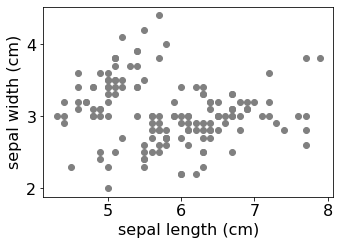

In [83]:
fig = plt.subplots(figsize =(5.2, 3.5))
plt.scatter(X[:,0],X[:,1], c='gray')
plt.xlabel(features[sel_f[0]])
plt.ylabel(features[sel_f[1]])
# plt.legend(handletextpad=0.1, fontsize=16)
# plt.title('Scatter plot on Iris dataset')
plt.savefig('unlabled_data.pdf', bbox_inches='tight')

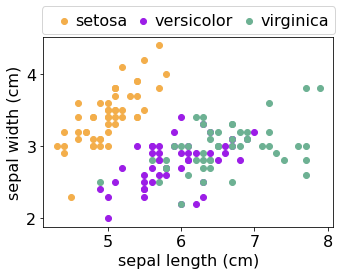

In [84]:
colors = ['#F3AE4B', '#9C1DE7', '#6DB193']
# colors = ['#2D3999', '#9A1BA0', '#F08181']
# colors = ['#00A8B5', '#F3AE4B', '#DE4383']
fig = plt.subplots(figsize =(5.2, 3.5))
for i, t in enumerate(targets):
    index = np.where(Y==i)[0]
    plt.scatter(X[index,0],X[index,1], c=colors[i], label=t)
plt.xlabel(features[sel_f[0]])
plt.ylabel(features[sel_f[1]])
# plt.legend(loc='upper right', handletextpad=0.1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=3, columnspacing=0, handletextpad=-0.3)
# plt.title('Scatter plot on Iris dataset')
plt.savefig('labled_data.pdf', bbox_inches='tight')

In [85]:
rep_models = {}
class_models = {}
X_C = {}
for c in [0,1,2]:
    X_c = X[np.where(Y==c)[0],:] 
    X_C[c] = X_c
    rep_model = NearestNeighbors(n_neighbors=1, algorithm='ball_tree', metric='euclidean')
    rep_model.fit(X_c)
    rep_models[c] = rep_model
    
    class_model = NearestNeighbors(n_neighbors=50, algorithm='ball_tree', metric='euclidean')
    class_model.fit(X_c)
    class_models[c] = class_model

In [86]:
overall_model =  NearestNeighbors(n_neighbors=50, algorithm='ball_tree', metric='euclidean')
overall_model.fit(X)

NearestNeighbors(algorithm='ball_tree', metric='euclidean', n_neighbors=50)

In [87]:
ind = 70
x = X[ind,:]
y = Y[ind]

/home/peyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  import sys


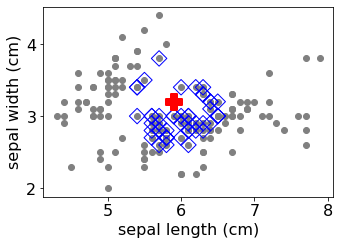

In [88]:
# instance-centered sampling
distances, indices = overall_model.kneighbors(x.reshape(1, -1))
N_x = X[indices[0][1:],:]
# highlighting x
fig = plt.subplots(figsize =(5.2, 3.5))
plt.scatter(X[:,0],X[:,1], c='gray')
plt.scatter(N_x[:,0],N_x[:,1],c='', edgecolor='blue', alpha=1.0, linewidth=1, marker='D', s=120)
plt.scatter(x[0], x[1], c='red', edgecolor='red', alpha=1.0, linewidth=2, marker='P', s=250)
plt.xlabel(features[sel_f[0]])
plt.ylabel(features[sel_f[1]])
plt.savefig(str(ind)+'_single_unlabled_data.pdf', bbox_inches='tight')

/home/peyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  # Remove the CWD from sys.path while we load stuff.


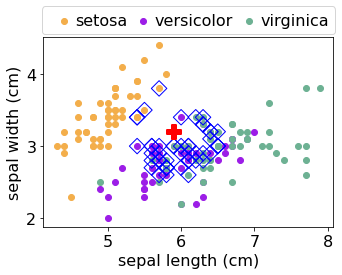

In [89]:
# instance-centered sampling
distances, indices = overall_model.kneighbors(x.reshape(1, -1))
N_x = X[indices[0][1:],:]
# highlighting x
# plt.scatter(X[:,0],X[:,1], c=Y)
fig = plt.subplots(figsize =(5.2, 3.5))
for i, t in enumerate(targets):
    index = np.where(Y==i)[0]
    plt.scatter(X[index,0],X[index,1], c=colors[i], label=t)
plt.scatter(N_x[:,0],N_x[:,1],c='', edgecolor='blue', alpha=1.0, linewidth=1, marker='D', s=120)
plt.scatter(x[0], x[1], c='red', edgecolor='red', alpha=1.0, linewidth=2, marker='P', s=220)
plt.xlabel(features[sel_f[0]])
plt.ylabel(features[sel_f[1]])
# plt.legend(loc='upper right', handletextpad=0.1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=3, columnspacing=0, handletextpad=-0.3)
plt.savefig(str(ind)+'_single_labled_data.pdf', bbox_inches='tight')

/home/peyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


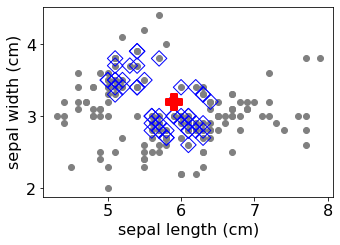

In [90]:
# multi-centerd sampling
x_hat = {}
for c in [0,1,2]:
    if c == y:
        x_hat[c] = x
    else:
        distances, indices = rep_models[c].kneighbors(x.reshape(1, -1))
        x_hat[c] = X_C[c][indices[0][0]].copy()
dist = []
data = []
for c in [0,1,2]:
    distances, indices = class_models[c].kneighbors(x_hat[c].reshape(1, -1))
    dist.append(distances[0])
    data.append(X_C[c][indices])
dist = np.hstack(dist)
data = np.hstack(data)
data = data[0]

sorted_indices = np.argsort(dist)
selected_indices = sorted_indices[:50]
N_x = data[selected_indices, :]

# highlighting x
fig = plt.subplots(figsize =(5.2, 3.5))
plt.scatter(X[:,0],X[:,1], c='gray')
plt.scatter(N_x[:,0],N_x[:,1],c='', edgecolor='blue', alpha=1.0, linewidth=1, marker='D', s=120)
plt.scatter(x[0], x[1], c='red', edgecolor='red', alpha=1.0, linewidth=2, marker='P', s=250)
plt.xlabel(features[sel_f[0]])
plt.ylabel(features[sel_f[1]])
plt.savefig(str(ind)+'_multi_unlabled_data.pdf', bbox_inches='tight')

/home/peyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


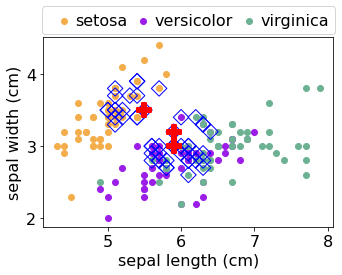

In [93]:
# multi-centerd sampling
x_hat = {}
for c in [0,1,2]:
    if c == y:
        x_hat[c] = x
    else:
        distances, indices = rep_models[c].kneighbors(x.reshape(1, -1))
        x_hat[c] = X_C[c][indices[0][0]].copy()
dist = []
data = []
for c in [0,1,2]:
    distances, indices = class_models[c].kneighbors(x_hat[c].reshape(1, -1))
    dist.append(distances[0])
    data.append(X_C[c][indices])
dist = np.hstack(dist)
data = np.hstack(data)
data = data[0]

sorted_indices = np.argsort(dist)
selected_indices = sorted_indices[:50]
N_x = data[selected_indices, :]

# highlighting x
# plt.scatter(X[:,0],X[:,1], c=Y)
fig = plt.subplots(figsize =(5.2, 3.5))
for i, t in enumerate(targets):
    index = np.where(Y==i)[0]
    plt.scatter(X[index,0],X[index,1], c=colors[i], label=t)
plt.scatter(N_x[:,0],N_x[:,1],c='', edgecolor='blue', alpha=1, linewidth=1, marker='D', s=120)
plt.scatter(x_hat[0][0], x_hat[0][1], c='red', edgecolor='red', alpha=1.0, linewidth=2, marker='P', s=220)
plt.scatter(x_hat[1][0], x_hat[1][1], c='red', edgecolor='red', alpha=1.0, linewidth=2, marker='P', s=220)
plt.scatter(x_hat[2][0], x_hat[2][1], c='red', edgecolor='red', alpha=1.0, linewidth=2, marker='P', s=220)
plt.xlabel(features[sel_f[0]])
plt.ylabel(features[sel_f[1]])
# plt.legend(loc='upper right', handletextpad=0.1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=3, columnspacing=0, handletextpad=-0.3)
plt.savefig(str(ind)+'_multi_labled_data.pdf',  bbox_inches='tight')